# batch normalization 

In [3]:
import numpy as np 
import pandas as pd 
import tensorflow as tf 
import matplotlib.pyplot as plt 
import h5py 

In [4]:
train_set = h5py.File("../datasets/train_signs.h5","r")
test_set = h5py.File("../datasets/test_signs.h5","r")

In [36]:
x_train = np.array(train_set["train_set_x"])
y_train = np.array(train_set["train_set_y"])
x_test = np.array(test_set["test_set_x"])
y_test = np.array(test_set["test_set_y"])

In [37]:
x_train = x_train/ 255.
x_test = x_test/255.

In [38]:
#print("data point species: "+str(x_train.element_spec) , "size of tarin set:"+str(x_train.cardinality().numpy()),"size of test set:"+str(x_test.cardinality().numpy()),sep="\n")
print(x_train.shape , x_test.shape , y_train.shape , y_test.shape , sep="\n")

(1080, 64, 64, 3)
(120, 64, 64, 3)
(1080,)
(120,)


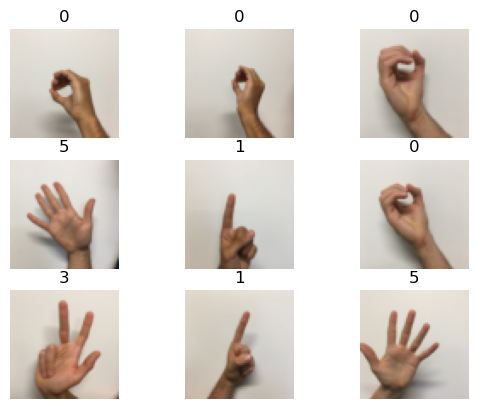

In [8]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[i])
    plt.title(y_test[i])
    plt.axis("off")

In [54]:
simple_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    #tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(512),
    #tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(512),
    #tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(512),
    #tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(6)
])

In [55]:
simple_model.compile(
    optimizer = "adam",
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ["accuracy"]
)

In [56]:
history = {}
history["simple"] = simple_model.fit(x_train , y_train , epochs=150 , batch_size= 256 , validation_data=(x_test,y_test),verbose=False)

In [42]:
simple_model.evaluate(x_train,y_train)

34/34 [==============================] - 0s 9ms/step - loss: 0.1923 - accuracy: 0.9222


[0.19234217703342438, 0.9222221970558167]

In [43]:
simple_model.evaluate(x_test,y_test)

4/4 [==============================] - 0s 11ms/step - loss: 0.5832 - accuracy: 0.7833


[0.5832284092903137, 0.7833333611488342]

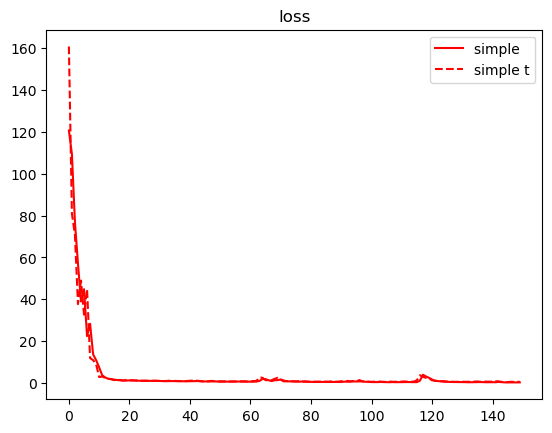

In [57]:
plt.plot(history["simple"].history["loss"],label="simple ",c="red")
plt.plot(history["simple"].history["val_loss"],label="simple t",c="red",linestyle="--")
#plt.plot(history["batch_normalize"].history["loss"],label="batch_n",c="orange")
#plt.plot(history["batch_normalize"].history["val_loss"],label="batch_n t",c="orange",linestyle="--")
plt.title("loss")
plt.legend()

In [63]:
batch_n_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(512),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(512),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(512),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(6)
])

In [64]:
batch_n_model.compile(
    optimizer = "adam",
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ["accuracy"]
)

In [ ]:
history["batch_n_model"] = batch_n_model.fit(x_train , y_train , epochs=150 , batch_size= 256 , validation_data=(x_test,y_test),verbose=False)

In [68]:
batch_n_model.evaluate(x_train , y_train)

34/34 [==============================] - 0s 10ms/step - loss: 0.0017 - accuracy: 1.0000


[0.0017472711624577641, 1.0]

(1.0, 20.0)

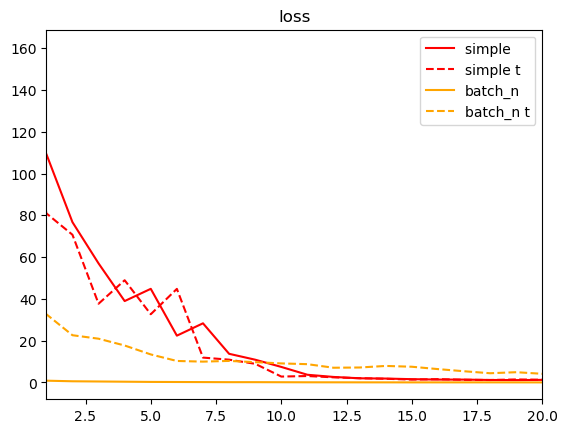

In [67]:
plt.plot(history["simple"].history["loss"],label="simple ",c="red")
plt.plot(history["simple"].history["val_loss"],label="simple t",c="red",linestyle="--")
plt.plot(history["batch_n_model"].history["loss"],label="batch_n",c="orange")
plt.plot(history["batch_n_model"].history["val_loss"],label="batch_n t",c="orange",linestyle="--")
plt.title("loss")
plt.legend()
plt.xlim(1,20)